In [52]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt


In [64]:
df=pd.read_csv('COVID-19 data for GCC countries.csv')
df

,date,Bahrain_new_cases,Bahrain_Mean_Tem,Bahrain_Mean_Dewpoint,Bahrain_Mean_Windspeed,Qatar_new_cases,Qatar_Mean_Temp,Qatar_Mean_Humidity,Qatar_Mean_Dewpoint,Qatar_Mean_Windspeed,...,Oman_new_cases,Oman_Mean_Temp,Oman_Mean_Humidity,Oman_Mean_Dewpoint,Oman_Mean_Windspeed,UAE_new_cases,UAE_Mean_Temp,UAE_Mean_Humidity,UAE_Mean_Dewpoint,UAE_Mean_Windspeed
0,4/17/2020,40,25,53,6,560,25,64,62,5,...,50,27,80,73,6,477,25,69,66,8
1,4/18/2020,33,28,54,9,345,25,67,65,8,...,111,27,74,72,7,0,26,67,67,8
2,4/19/2020,108,25,64,9,440,26,77,71,8,...,86,28,79,76,7,479,30,42,58,7
3,4/20/2020,26,25,60,6,567,27,65,67,8,...,144,30,67,73,7,484,31,39,59,9
4,4/21/2020,66,26,57,6,518,27,59,64,7,...,98,31,47,64,8,490,29,47,62,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,6/17/2021,547,34,63,24,127,37,20,51,18,...,2015,36,52,75,6,2167,33,63,78,10
427,6/18/2021,487,33,63,22,184,36,25,54,16,...,2966,33,76,82,7,1942,33,66,79,8
428,6/19/2021,439,33,65,15,184,35,33,61,12,...,3299,32,75,81,7,2109,34,66,80,8
429,6/20/2021,465,33,70,15,107,34,54,72,10,...,5320,33,74,81,6,1850,37,48,70,8


In [54]:
df.isnull().sum()

Bahrain_new_cases         0
Bahrain_Mean_Tem          0
Bahrain_Mean_Dewpoint     0
Bahrain_Mean_Windspeed    0
Qatar_new_cases           0
Qatar_Mean_Temp           0
Qatar_Mean_Humidity       0
Qatar_Mean_Dewpoint       0
Qatar_Mean_Windspeed      0
KSA_new_cases             0
KSA_Mean_Temp             0
KSA_Mean_Humidity         0
KSA_Mean_Dewpoint         0
KSA_Mean_Windspeed        0
Kuwait_new_cases          0
Kuwait_Mean_Temp          0
Kuwait_Mean_Humidity      0
Kuwait_Mean_Dewpoint      0
Kuwait_Mean_Windspeed     0
Oman_new_cases            0
Oman_Mean_Temp            0
Oman_Mean_Humidity        0
Oman_Mean_Dewpoint        0
Oman_Mean_Windspeed       0
UAE_new_cases             0
UAE_Mean_Temp             0
UAE_Mean_Humidity         0
UAE_Mean_Dewpoint         0
UAE_Mean_Windspeed        0
dtype: int64

<AxesSubplot:xlabel='date'>

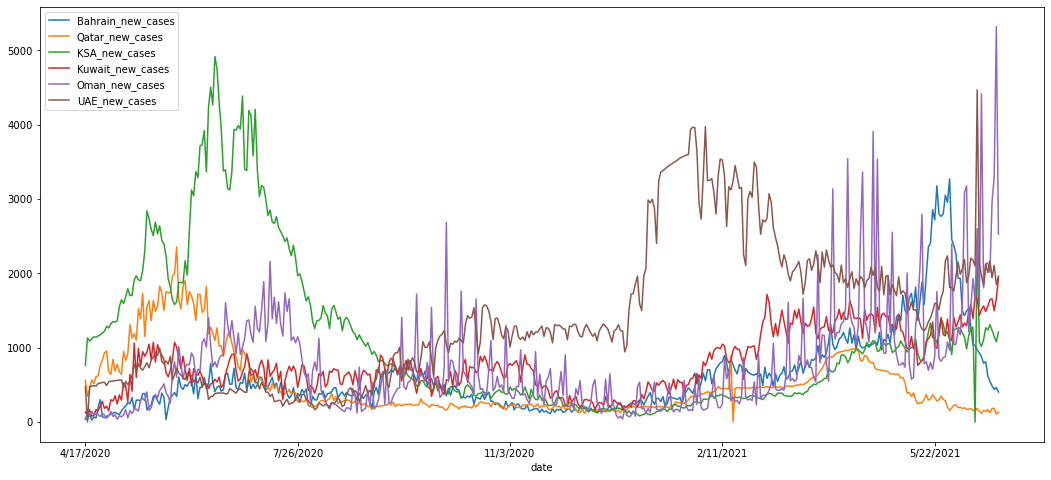

In [59]:
df[["Bahrain_new_cases","Qatar_new_cases","KSA_new_cases","Kuwait_new_cases","Oman_new_cases","UAE_new_cases"]].plot(figsize=(18,8))

In [65]:
train_dates=pd.to_datetime(df['date'])

In [392]:
UAECOVID=df[["UAE_new_cases","UAE_Mean_Temp","UAE_Mean_Dewpoint","UAE_Mean_Windspeed"]]
UAECOVID.shape

(431, 4)

In [393]:
scalarUAECOVID=MinMaxScaler()
scalarUAECOVID.fit(UAECOVID)
normalizedUAECOVID=scalarUAECOVID.transform(UAECOVID)

print(type(normalizedUAECOVID[6][0]))
print(normalizedUAECOVID[0][0],normalizedUAECOVID[0][1],normalizedUAECOVID[1][0],normalizedUAECOVID[1][1])

<class 'numpy.float64'>
0.10668754193692685 0.30434782608695654 0.0 0.34782608695652173


In [394]:
from numpy import hstack
n_input=7
n_output=1
casesUAE=[]
UAEtemp=[]
UAEdew=[]
UAEwind=[]
number=normalizedUAECOVID.shape[0]
print(number)
print(type(normalizedUAECOVID))
targetUAE=[]
targetCases=normalizedUAECOVID[:,0]
for i in range(0,number):
    casesUAE.append(normalizedUAECOVID[i][0])
    UAEtemp.append(normalizedUAECOVID[i][1])
    UAEdew.append(normalizedUAECOVID[i][2])
    UAEwind.append(normalizedUAECOVID[i][3])

casesUAE=np.array(casesUAE)
UAEtemp=np.array(UAEtemp)
UAEdew=np.array(UAEdew)
UAEwind=np.array(UAEwind)
print(len(casesUAE),len(UAEtemp),len(UAEdew),len(UAEwind))
casesUAE=casesUAE.reshape(len(casesUAE),1)
UAEtemp=UAEtemp.reshape(len(UAEtemp),1)
UAEdew=UAEdew.reshape(len(UAEdew),1)
UAEwind=UAEwind.reshape(len(UAEwind),1)
print(casesUAE.shape)
datasetUAE=hstack((casesUAE,UAEtemp,UAEdew,UAEwind))
print(datasetUAE.shape)
generatorUAE=TimeseriesGenerator(datasetUAE,targetCases,length=n_input,batch_size=1)
print(generatorUAE[1])

431
<class 'numpy.ndarray'>
431 431 431 431
(431, 1)
(431, 4)
(array([[[0.        , 0.34782609, 0.67924528, 0.3       ],
        [0.10713487, 0.52173913, 0.50943396, 0.2       ],
        [0.10825319, 0.56521739, 0.52830189, 0.4       ],
        [0.10959517, 0.47826087, 0.58490566, 0.5       ],
        [0.10802952, 0.47826087, 0.58490566, 0.4       ],
        [0.11585775, 0.47826087, 0.54716981, 0.2       ],
        [0.1174234 , 0.56521739, 0.50943396, 0.2       ]]]), array([0.11898904]))


In [395]:
dataUAE=[]
targetUAE=[]
for i in range(len(generatorUAE)):
    data1,target1=generatorUAE[i]
    dataUAE.append(data1[0,:,:])
    xx=float(target1)
    targetUAE.append(xx)
dataUAE=np.array(dataUAE)
targetUAE=np.array(targetUAE)
print(type(dataUAE))
print(dataUAE.shape)
print(targetUAE.shape)
x_train_UAE,x_test_UAE,y_train_UAE,y_test_UAE=train_test_split(dataUAE,targetUAE,test_size=0.2,random_state=4)
print(type(dataUAE))
print(x_train_UAE.shape)

<class 'numpy.ndarray'>
(424, 7, 4)
(424,)
<class 'numpy.ndarray'>
(339, 7, 4)


In [411]:
model=Sequential()
model.add(LSTM((10),input_shape=(x_train_UAE.shape[1],x_train_UAE.shape[2]),return_sequences=True))
model.add(LSTM((10),return_sequences=True))
model.add(LSTM((1),return_sequences=False))
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_56 (LSTM)               (None, 7, 10)             600       
_________________________________________________________________
lstm_57 (LSTM)               (None, 7, 10)             840       
_________________________________________________________________
lstm_58 (LSTM)               (None, 1)                 48        
Total params: 1,488
Trainable params: 1,488
Non-trainable params: 0
_________________________________________________________________


In [412]:
history=model.fit(x_train_UAE, y_train_UAE, epochs=400, validation_data=(x_test_UAE,y_test_UAE))

Epoch 1/400
11/11 [==============================] - 6s 121ms/step - loss: 0.2336 - accuracy: 0.0000e+00 - val_loss: 0.1710 - val_accuracy: 0.0000e+00
Epoch 2/400
11/11 [==============================] - 0s 10ms/step - loss: 0.1671 - accuracy: 0.0000e+00 - val_loss: 0.1444 - val_accuracy: 0.0000e+00
Epoch 3/400
11/11 [==============================] - 0s 10ms/step - loss: 0.1414 - accuracy: 0.0000e+00 - val_loss: 0.1363 - val_accuracy: 0.0000e+00
Epoch 4/400
11/11 [==============================] - 0s 11ms/step - loss: 0.1313 - accuracy: 0.0000e+00 - val_loss: 0.1170 - val_accuracy: 0.0000e+00
Epoch 5/400
11/11 [==============================] - 0s 11ms/step - loss: 0.1079 - accuracy: 0.0000e+00 - val_loss: 0.0967 - val_accuracy: 0.0000e+00
Epoch 6/400
11/11 [==============================] - 0s 10ms/step - loss: 0.0927 - accuracy: 0.0000e+00 - val_loss: 0.0708 - val_accuracy: 0.0000e+00
Epoch 7/400
11/11 [==============================] - 0s 11ms/step - loss: 0.0684 - accuracy: 0.0000

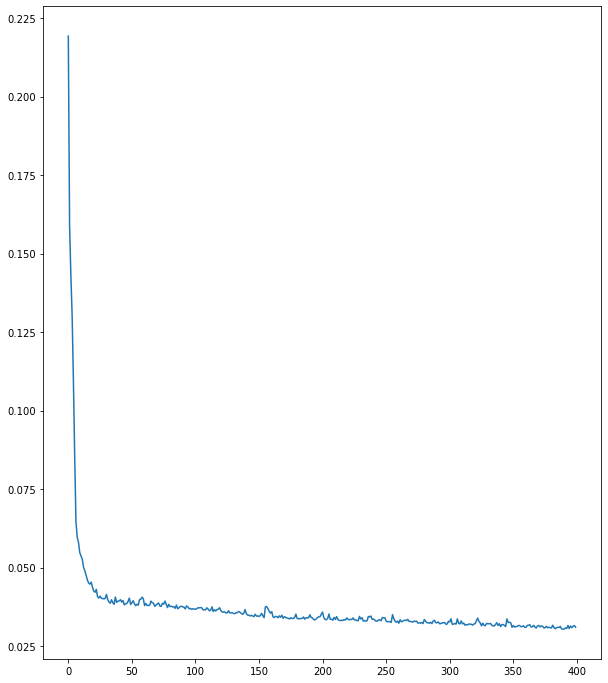

In [413]:
plt.plot(history.history['loss'])
plt.show()

85


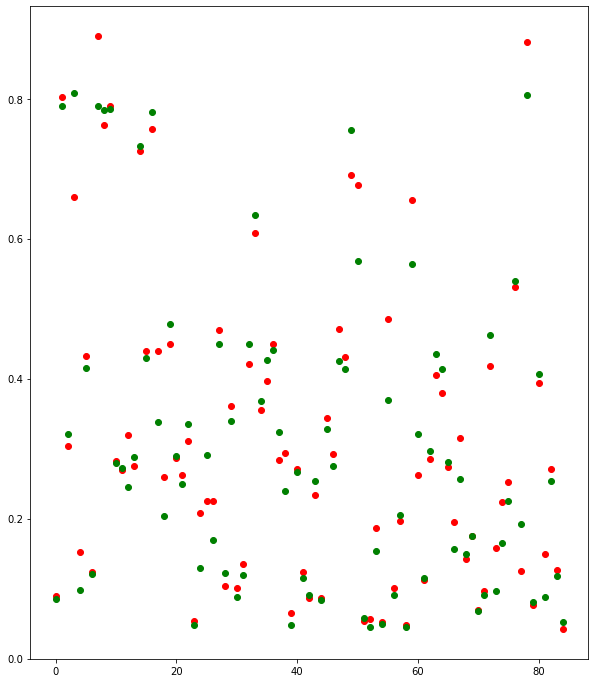

(85, 1)


In [414]:
results_UAE=model.predict(x_test_UAE)
print(len(results_UAE))

plt.scatter(range(len(y_test_UAE)),y_test_UAE,c='r')
plt.scatter(range(len(results_UAE)), results_UAE, c='g')
plt.show()
print(results_UAE.shape)

In [415]:

print(resultsNotScaledUAE.shape)
print(targetNotScaledUAE.shape)



(85, 4)
(85, 4)


[[0.08495476 0.08495476 0.08495476 0.08495476]
 [0.7900667  0.7900667  0.7900667  0.7900667 ]
 [0.3205454  0.3205454  0.3205454  0.3205454 ]
 [0.8086509  0.8086509  0.8086509  0.8086509 ]
 [0.0986861  0.0986861  0.0986861  0.0986861 ]
 [0.41592225 0.41592225 0.41592225 0.41592225]
 [0.1216859  0.1216859  0.1216859  0.1216859 ]
 [0.7893104  0.7893104  0.7893104  0.7893104 ]
 [0.7833697  0.7833697  0.7833697  0.7833697 ]
 [0.7857136  0.7857136  0.7857136  0.7857136 ]
 [0.2799239  0.2799239  0.2799239  0.2799239 ]
 [0.27233455 0.27233455 0.27233455 0.27233455]
 [0.24482161 0.24482161 0.24482161 0.24482161]
 [0.2889235  0.2889235  0.2889235  0.2889235 ]
 [0.7322253  0.7322253  0.7322253  0.7322253 ]
 [0.42915088 0.42915088 0.42915088 0.42915088]
 [0.7804226  0.7804226  0.7804226  0.7804226 ]
 [0.3376715  0.3376715  0.3376715  0.3376715 ]
 [0.20401727 0.20401727 0.20401727 0.20401727]
 [0.4775278  0.4775278  0.4775278  0.4775278 ]
 [0.28996798 0.28996798 0.28996798 0.28996798]
 [0.25023526 

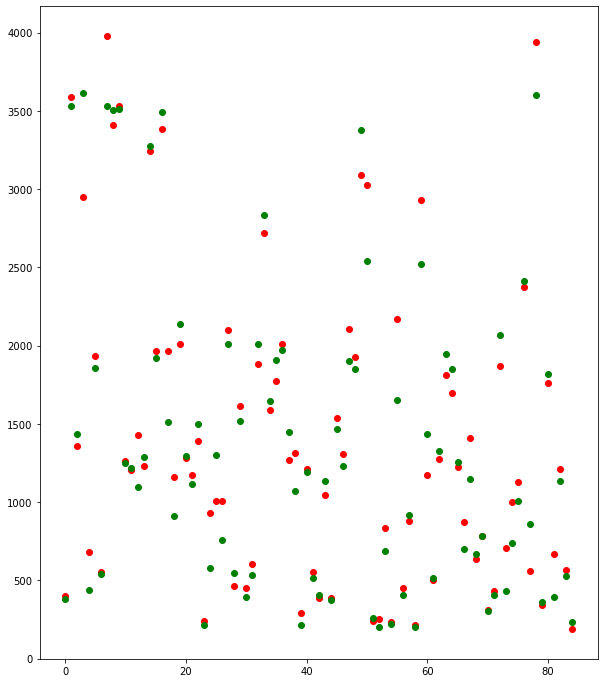

In [416]:
results_UAE2=results_UAE.reshape(-1,1)
forecast_copies=np.repeat(results_UAE2,4,axis=-1)
print(forecast_copies)
resultsNotScaledUAE=scalarUAECOVID.inverse_transform(forecast_copies)
print(type(resultsNotScaledUAE))
resultsNotScaled=resultsNotScaledUAE[:,0]


y_test2_UAE=y_test_UAE.reshape(-1,1)
y_test2_UAE=np.repeat(y_test2_UAE,4,axis=-1)
targetNotScaledUAE=scalarUAECOVID.inverse_transform(y_test2_UAE)
targetNotScaled=targetNotScaledUAE[:,0]


plt.scatter(range(len(targetNotScaledUAE)),targetNotScaled,c='r')
plt.scatter(range(len(resultsNotScaledUAE)),resultsNotScaled,c='g')
plt.show()

In [417]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(results_UAE,y_test_UAE))
print(rmse)
rmse=sqrt(mean_squared_error(resultsNotScaledUAE, targetNotScaledUAE))
print(rmse)

0.043135430056608456
96.4375491379008


In [418]:
KSACOVID=df[["KSA_new_cases","KSA_Mean_Temp","KSA_Mean_Dewpoint","KSA_Mean_Windspeed"]]
KSACOVID.shape

(431, 4)

In [419]:
scalarKSACOVID=MinMaxScaler()
scalarKSACOVID.fit(KSACOVID)
normalizedKSACOVID=scalarKSACOVID.transform(KSACOVID)

print(type(normalizedKSACOVID[4][0]))
print(normalizedKSACOVID[0][0],normalizedKSACOVID[0][1],normalizedKSACOVID[1][0],normalizedKSACOVID[1][1])

<class 'numpy.float64'>
0.1549095344582232 0.40000000000000013 0.23012807481195363 0.40000000000000013


In [420]:
from numpy import hstack
n_input=7
n_output=1
casesKSA=[]
KSAtemp=[]
KSAdew=[]
KSAwind=[]
number=normalizedKSACOVID.shape[0]
print(number)
print(type(normalizedKSACOVID))
targetKSA=[]
targetCases1=normalizedKSACOVID[:,0]
for i in range(0,number):
    casesKSA.append(normalizedKSACOVID[i][0])
    KSAtemp.append(normalizedKSACOVID[i][1])
    KSAdew.append(normalizedKSACOVID[i][2])
    KSAwind.append(normalizedKSACOVID[i][3])

casesKSA=np.array(casesKSA)
KSAtemp=np.array(KSAtemp)
KSAdew=np.array(KSAdew)
KSAwind=np.array(KSAwind)
print(len(casesKSA),len(KSAtemp),len(KSAdew),len(KSAwind))
casesKSA=casesKSA.reshape(len(casesKSA),1)
KSAtemp=KSAtemp.reshape(len(KSAtemp),1)
KSAdew=KSAdew.reshape(len(KSAdew),1)
KSAwind=KSAwind.reshape(len(KSAwind),1)
print(casesKSA.shape)
datasetKSA=hstack((casesKSA,KSAtemp,KSAdew,KSAwind))
print(datasetKSA.shape)
generatorKSA=TimeseriesGenerator(datasetKSA,targetCases1,length=n_input,batch_size=1)
print(generatorKSA[1])

431
<class 'numpy.ndarray'>
431 431 431 431
(431, 1)
(431, 4)
(array([[[0.23012807, 0.4       , 0.56818182, 0.375     ],
        [0.22118317, 0.46666667, 0.65909091, 0.25      ],
        [0.22809514, 0.53333333, 0.63636364, 0.25      ],
        [0.23317748, 0.46666667, 0.63636364, 0.125     ],
        [0.23195771, 0.4       , 0.72727273, 0.25      ],
        [0.2354137 , 0.53333333, 0.68181818, 0.125     ],
        [0.23825981, 0.6       , 0.45454545, 0.1875    ]]]), array([0.24334214]))


In [421]:
dataKSA=[]
targetKSA=[]
for i in range(len(generatorKSA)):
    data2,target2=generatorKSA[i]
    dataKSA.append(data2[0,:,:])
    xx=float(target2)
    targetKSA.append(xx)
dataKSA=np.array(dataKSA)
targetKSA=np.array(targetKSA)
print(type(dataKSA))
print(dataKSA.shape)
print(targetKSA.shape)
x_train_KSA,x_test_KSA,y_train_KSA,y_test_KSA=train_test_split(dataKSA,targetKSA,test_size=0.2,random_state=4)
print(type(dataKSA))
print(x_train_KSA.shape)

<class 'numpy.ndarray'>
(424, 7, 4)
(424,)
<class 'numpy.ndarray'>
(339, 7, 4)


In [422]:
model=Sequential()
model.add(LSTM((10),input_shape=(x_train_KSA.shape[1],x_train_KSA.shape[2]),return_sequences=True))
model.add(LSTM((10),return_sequences=True))
model.add(LSTM((1),return_sequences=False))
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_59 (LSTM)               (None, 7, 10)             600       
_________________________________________________________________
lstm_60 (LSTM)               (None, 7, 10)             840       
_________________________________________________________________
lstm_61 (LSTM)               (None, 1)                 48        
Total params: 1,488
Trainable params: 1,488
Non-trainable params: 0
_________________________________________________________________


In [423]:
history1=model.fit(x_train_KSA, y_train_KSA, epochs=400, validation_data=(x_test_KSA,y_test_KSA))

Epoch 1/400
11/11 [==============================] - 6s 120ms/step - loss: 0.1859 - accuracy: 0.0000e+00 - val_loss: 0.1678 - val_accuracy: 0.0118
Epoch 2/400
11/11 [==============================] - 0s 11ms/step - loss: 0.1379 - accuracy: 0.0000e+00 - val_loss: 0.1608 - val_accuracy: 0.0118
Epoch 3/400
11/11 [==============================] - 0s 11ms/step - loss: 0.1337 - accuracy: 0.0000e+00 - val_loss: 0.1549 - val_accuracy: 0.0118
Epoch 4/400
11/11 [==============================] - 0s 11ms/step - loss: 0.1363 - accuracy: 0.0000e+00 - val_loss: 0.1459 - val_accuracy: 0.0118
Epoch 5/400
11/11 [==============================] - 0s 11ms/step - loss: 0.1185 - accuracy: 0.0000e+00 - val_loss: 0.1341 - val_accuracy: 0.0118
Epoch 6/400
11/11 [==============================] - 0s 11ms/step - loss: 0.1078 - accuracy: 0.0000e+00 - val_loss: 0.1164 - val_accuracy: 0.0118
Epoch 7/400
11/11 [==============================] - 0s 11ms/step - loss: 0.0918 - accuracy: 0.0000e+00 - val_loss: 0.0903 

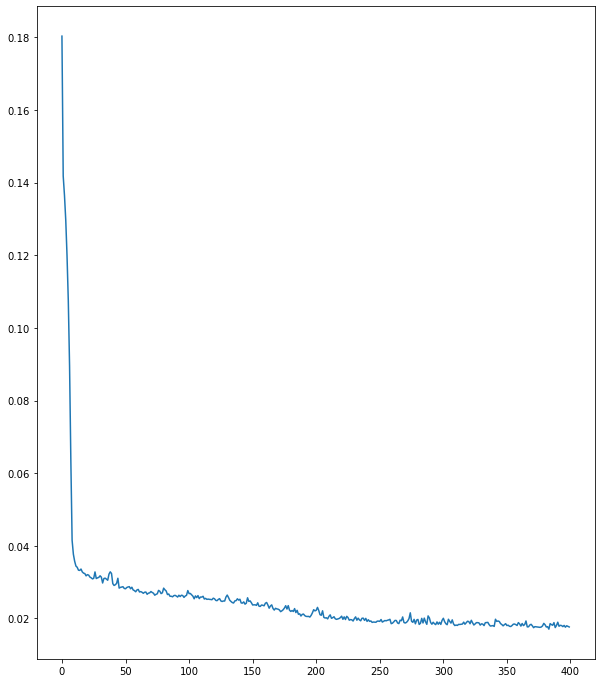

In [424]:
plt.plot(history1.history['loss'])
plt.show()

85


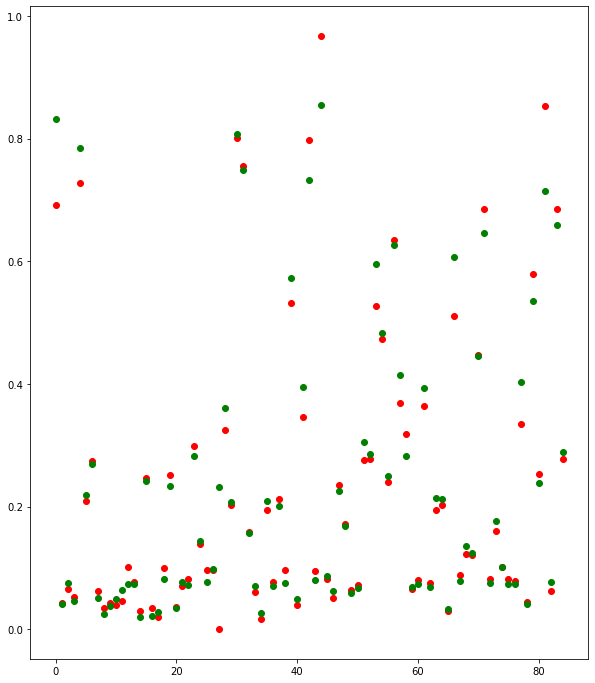

(85, 1)


In [425]:
results_KSA=model.predict(x_test_KSA)
print(len(results_KSA))

plt.scatter(range(len(y_test_KSA)),y_test_KSA,c='r')
plt.scatter(range(len(results_KSA)), results_KSA, c='g')
plt.show()
print(results_KSA.shape)

In [426]:
print(results_KSA.shape)
print(results_KSA2.shape)
print(forecast_copies1.shape)
print(x_test_KSA.shape)

(85, 1)
(85, 1)
(85, 4)
(85, 7, 4)


(85, 4)
<class 'numpy.ndarray'>


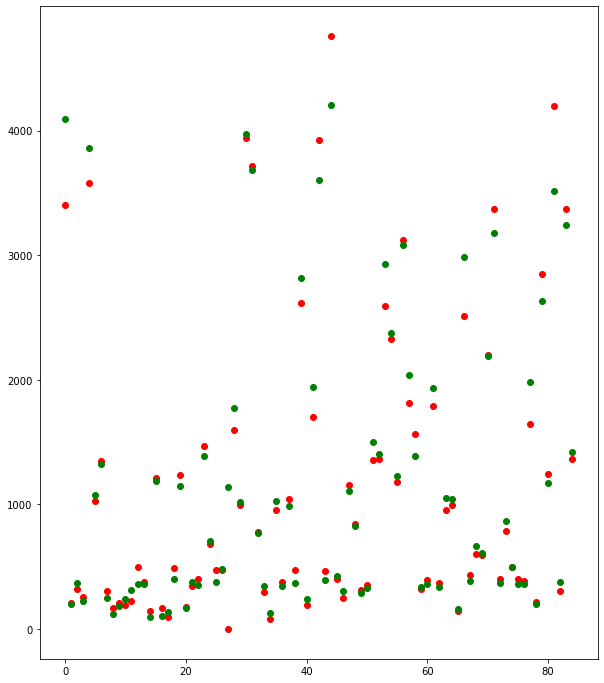

In [427]:
results_KSA2=results_KSA.reshape(-1,1)
forecast_copies1=np.repeat(results_KSA2,4,axis=1)
print(forecast_copies1.shape)
resultsNotScaledKSA=scalarKSACOVID.inverse_transform(forecast_copies1)
print(type(resultsNotScaledKSA))
resultsNotScaledKSA=resultsNotScaledKSA[:,0]

y_test2_KSA=y_test_KSA.reshape(-1,1)
y_test2_KSA=np.repeat(y_test2_KSA,4,axis=-1)
targetNotScaledKSA=scalarKSACOVID.inverse_transform(y_test2_KSA)
targetNotScaledKSA=targetNotScaledKSA[:,0]



plt.scatter(range(len(targetNotScaledKSA)),targetNotScaledKSA,c='r')
plt.scatter(range(len(resultsNotScaledKSA)),resultsNotScaledKSA,c='g')
plt.show()


In [428]:
print(resultsNotScaledKSA.shape)
print(targetNotScaledKSA.shape)

(85,)
(85,)


In [429]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(results_KSA,y_test_KSA))
print(rmse)
rmse=sqrt(mean_squared_error(resultsNotScaledKSA, targetNotScaledKSA))
print(rmse)

0.04247946196856127
208.95647183496928


In [430]:
BahrainCOVID=df[["Bahrain_new_cases","Bahrain_Mean_Tem","Bahrain_Mean_Dewpoint","Bahrain_Mean_Windspeed"]]
BahrainCOVID.shape

(431, 4)

In [431]:
scalarBahrainCOVID=MinMaxScaler()
scalarBahrainCOVID.fit(BahrainCOVID)
normalizedBahrainCOVID=scalarBahrainCOVID.transform(BahrainCOVID)

print(type(normalizedBahrainCOVID[6][0]))
print(normalizedBahrainCOVID[0][0],normalizedBahrainCOVID[0][1],normalizedBahrainCOVID[1][0],normalizedBahrainCOVID[1][1])

<class 'numpy.float64'>
0.004311672312904219 0.4166666666666665 0.0021558361564521095 0.5416666666666665


In [432]:
from numpy import hstack
n_input=7
n_output=1
casesBahrain=[]
Bahraintemp=[]
Bahraindew=[]
Bahrainwind=[]
number=normalizedBahrainCOVID.shape[0]
print(number)
print(type(normalizedBahrainCOVID))
targetBahrain=[]
targetCases2=normalizedBahrainCOVID[:,0]
for i in range(0,number):
    casesBahrain.append(normalizedBahrainCOVID[i][0])
    Bahraintemp.append(normalizedBahrainCOVID[i][1])
    Bahraindew.append(normalizedBahrainCOVID[i][2])
    Bahrainwind.append(normalizedBahrainCOVID[i][3])

casesBahrain=np.array(casesBahrain)
Bahraintemp=np.array(Bahraintemp)
Bahraindew=np.array(Bahraindew)
Bahrainwind=np.array(Bahrainwind)
print(len(casesBahrain),len(Bahraintemp),len(Bahraindew),len(Bahrainwind))
casesBahrain=casesBahrain.reshape(len(casesBahrain),1)
Bahraintemp=Bahraintemp.reshape(len(Bahraintemp),1)
Bahraindew=Bahraindew.reshape(len(Bahraindew),1)
Bahrainwind=Bahrainwind.reshape(len(Bahrainwind),1)
print(casesBahrain.shape)
datasetBahrain=hstack((casesBahrain,Bahraintemp,Bahraindew,Bahrainwind))
print(datasetBahrain.shape)
generatorBahrain=TimeseriesGenerator(datasetBahrain,targetCases2,length=n_input,batch_size=1)
print(generatorBahrain[1])

431
<class 'numpy.ndarray'>
431 431 431 431
(431, 1)
(431, 4)
(array([[[0.00215584, 0.54166667, 0.23076923, 0.24      ],
        [0.02525408, 0.41666667, 0.48717949, 0.24      ],
        [0.        , 0.41666667, 0.38461538, 0.12      ],
        [0.01231906, 0.45833333, 0.30769231, 0.12      ],
        [0.00862334, 0.45833333, 0.20512821, 0.12      ],
        [0.05050816, 0.5       , 0.17948718, 0.28      ],
        [0.08469356, 0.54166667, 0.33333333, 0.28      ]]]), array([0.01355097]))


In [433]:
dataBahrain=[]
targetBahrain=[]
for i in range(len(generatorBahrain)):
    data3,target3=generatorBahrain[i]
    dataBahrain.append(data3[0,:,:])
    xx=float(target3)
    targetBahrain.append(xx)
dataBahrain=np.array(dataBahrain)
targetBahrain=np.array(targetBahrain)
print(type(dataBahrain))
print(dataBahrain.shape)
print(targetBahrain.shape)
x_train_Bahrain,x_test_Bahrain,y_train_Bahrain,y_test_Bahrain=train_test_split(dataBahrain,targetBahrain,test_size=0.2,random_state=4)
print(type(dataBahrain))
print(x_train_Bahrain.shape)

<class 'numpy.ndarray'>
(424, 7, 4)
(424,)
<class 'numpy.ndarray'>
(339, 7, 4)


In [434]:
model=Sequential()
model.add(LSTM((10),input_shape=(x_train_Bahrain.shape[1],x_train_Bahrain.shape[2]),return_sequences=True))
model.add(LSTM((10),return_sequences=True))
model.add(LSTM((1),return_sequences=False))
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_62 (LSTM)               (None, 7, 10)             600       
_________________________________________________________________
lstm_63 (LSTM)               (None, 7, 10)             840       
_________________________________________________________________
lstm_64 (LSTM)               (None, 1)                 48        
Total params: 1,488
Trainable params: 1,488
Non-trainable params: 0
_________________________________________________________________


In [435]:
history2=model.fit(x_train_Bahrain, y_train_Bahrain, epochs=400, validation_data=(x_test_Bahrain,y_test_Bahrain))


Epoch 1/400
11/11 [==============================] - 6s 116ms/step - loss: 0.1137 - accuracy: 0.0000e+00 - val_loss: 0.0865 - val_accuracy: 0.0000e+00
Epoch 2/400
11/11 [==============================] - 0s 10ms/step - loss: 0.1051 - accuracy: 0.0000e+00 - val_loss: 0.0751 - val_accuracy: 0.0000e+00
Epoch 3/400
11/11 [==============================] - 0s 10ms/step - loss: 0.0969 - accuracy: 0.0000e+00 - val_loss: 0.0691 - val_accuracy: 0.0000e+00
Epoch 4/400
11/11 [==============================] - 0s 10ms/step - loss: 0.0979 - accuracy: 0.0000e+00 - val_loss: 0.0714 - val_accuracy: 0.0000e+00
Epoch 5/400
11/11 [==============================] - 0s 11ms/step - loss: 0.0775 - accuracy: 0.0000e+00 - val_loss: 0.0598 - val_accuracy: 0.0000e+00
Epoch 6/400
11/11 [==============================] - 0s 11ms/step - loss: 0.0731 - accuracy: 0.0000e+00 - val_loss: 0.0558 - val_accuracy: 0.0000e+00
Epoch 7/400
11/11 [==============================] - 0s 11ms/step - loss: 0.0608 - accuracy: 0.0000

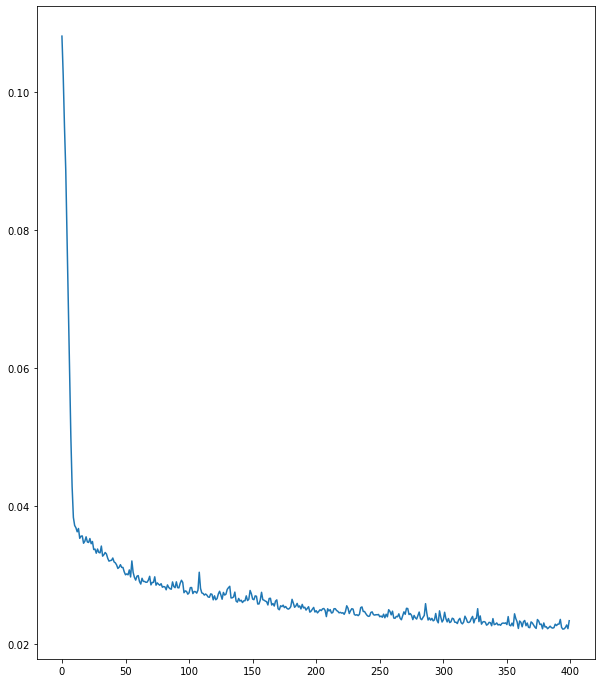

In [436]:
plt.plot(history2.history['loss'])
plt.show()

85


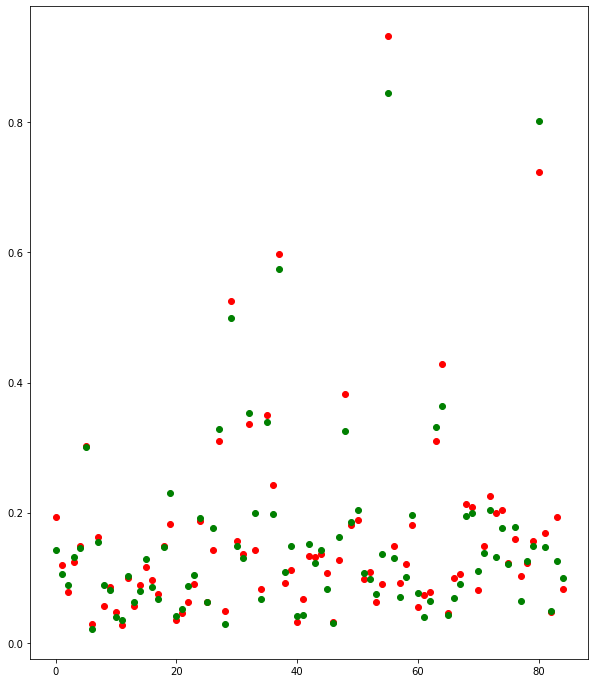

(85, 1)


In [437]:
results_Bahrain=model.predict(x_test_Bahrain)
print(len(results_Bahrain))

plt.scatter(range(len(y_test_Bahrain)),y_test_Bahrain,c='r')
plt.scatter(range(len(results_Bahrain)), results_Bahrain, c='g')
plt.show()
print(results_Bahrain.shape)

[[0.14232458 0.14232458 0.14232458 0.14232458]
 [0.10649801 0.10649801 0.10649801 0.10649801]
 [0.08951805 0.08951805 0.08951805 0.08951805]
 [0.13220873 0.13220873 0.13220873 0.13220873]
 [0.14654437 0.14654437 0.14654437 0.14654437]
 [0.30163476 0.30163476 0.30163476 0.30163476]
 [0.02126794 0.02126794 0.02126794 0.02126794]
 [0.15458773 0.15458773 0.15458773 0.15458773]
 [0.08922967 0.08922967 0.08922967 0.08922967]
 [0.0820111  0.0820111  0.0820111  0.0820111 ]
 [0.039963   0.039963   0.039963   0.039963  ]
 [0.03467893 0.03467893 0.03467893 0.03467893]
 [0.10237685 0.10237685 0.10237685 0.10237685]
 [0.06301071 0.06301071 0.06301071 0.06301071]
 [0.08035961 0.08035961 0.08035961 0.08035961]
 [0.12936264 0.12936264 0.12936264 0.12936264]
 [0.08553346 0.08553346 0.08553346 0.08553346]
 [0.0667997  0.0667997  0.0667997  0.0667997 ]
 [0.1476735  0.1476735  0.1476735  0.1476735 ]
 [0.2300037  0.2300037  0.2300037  0.2300037 ]
 [0.041285   0.041285   0.041285   0.041285  ]
 [0.05240483 

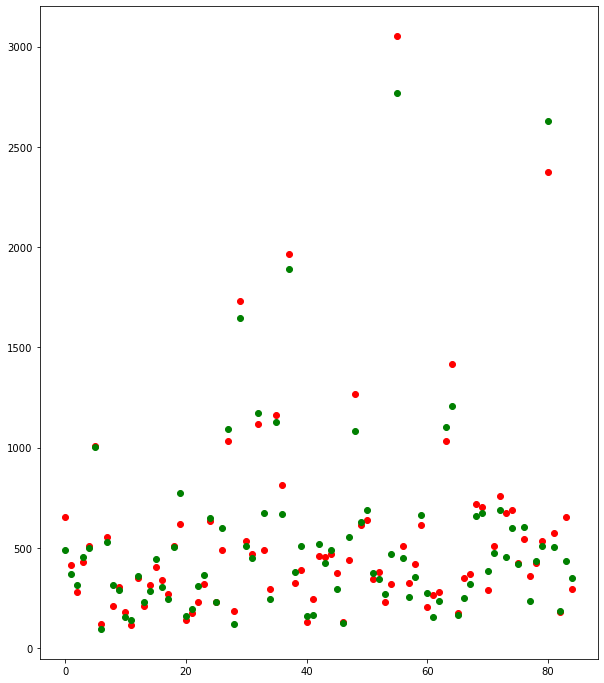

In [441]:
results_Bahrain2=results_Bahrain.reshape(-1,1)
forecast_copies2=np.repeat(results_Bahrain2,4,axis=-1)
print(forecast_copies2)
resultsNotScaledBahrain=scalarBahrainCOVID.inverse_transform(forecast_copies2)
print(type(resultsNotScaledBahrain))
resultsNotScaledBahrain=resultsNotScaledBahrain[:,0]


y_test2_Bahrain=y_test_Bahrain.reshape(-1,1)
y_test2_Bahrain=np.repeat(y_test2_Bahrain,4,axis=-1)
targetNotScaledBahrain=scalarBahrainCOVID.inverse_transform(y_test2_Bahrain)
targetNotScaledBahrain=targetNotScaledBahrain[:,0]


plt.scatter(range(len(targetNotScaledBahrain)),targetNotScaledBahrain,c='r')
plt.scatter(range(len(resultsNotScaledBahrain)),resultsNotScaledBahrain,c='g')
plt.show()

In [442]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(results_Bahrain,y_test_Bahrain))
print(rmse)
rmse=sqrt(mean_squared_error(resultsNotScaledBahrain, targetNotScaledBahrain))
print(rmse)

0.027565814527342886
89.50620104052244


In [443]:
KuwaitCOVID=df[["Kuwait_new_cases","Kuwait_Mean_Temp","Kuwait_Mean_Dewpoint","Kuwait_Mean_Windspeed"]]
KuwaitCOVID.shape

(431, 4)

In [444]:
scalarKuwaitCOVID=MinMaxScaler()
scalarKuwaitCOVID.fit(KuwaitCOVID)
normalizedKuwaitCOVID=scalarKuwaitCOVID.transform(KuwaitCOVID)

print(type(normalizedKuwaitCOVID[6][0]))
print(normalizedKuwaitCOVID[0][0],normalizedKuwaitCOVID[0][1],normalizedKuwaitCOVID[1][0],normalizedKuwaitCOVID[1][1])

<class 'numpy.float64'>
0.029110512129380053 0.4705882352941176 0.007008086253369274 0.41176470588235287


In [445]:
from numpy import hstack
n_input=7
n_output=1
casesKuwait=[]
Kuwaittemp=[]
Kuwaitdew=[]
Kuwaitwind=[]
number=normalizedKuwaitCOVID.shape[0]
print(number)
print(type(normalizedKuwaitCOVID))
targetKuwait=[]
targetCases3=normalizedKuwaitCOVID[:,0]
for i in range(0,number):
    casesKuwait.append(normalizedKuwaitCOVID[i][0])
    Kuwaittemp.append(normalizedKuwaitCOVID[i][1])
    Kuwaitdew.append(normalizedKuwaitCOVID[i][2])
    Kuwaitwind.append(normalizedKuwaitCOVID[i][3])

casesKuwait=np.array(casesKuwait)
Kuwaittemp=np.array(Kuwaittemp)
Kuwaitdew=np.array(Kuwaitdew)
Kuwaitwind=np.array(Kuwaitwind)
print(len(casesKuwait),len(Kuwaittemp),len(Kuwaitdew),len(Kuwaitwind))
casesKuwait=casesKuwait.reshape(len(casesKuwait),1)
Kuwaittemp=Kuwaittemp.reshape(len(Kuwaittemp),1)
Kuwaitdew=Kuwaitdew.reshape(len(Kuwaitdew),1)
Kuwaitwind=Kuwaitwind.reshape(len(Kuwaitwind),1)
print(casesKuwait.shape)
datasetKuwait=hstack((casesKuwait,Kuwaittemp,Kuwaitdew,Kuwaitwind))
print(datasetKuwait.shape)
generatorKuwait=TimeseriesGenerator(datasetKuwait,targetCases3,length=n_input,batch_size=1)
print(generatorKuwait[1])

431
<class 'numpy.ndarray'>
431 431 431 431
(431, 1)
(431, 4)
(array([[[0.00700809, 0.41176471, 0.62711864, 0.38461538],
        [0.04528302, 0.47058824, 0.57627119, 0.30769231],
        [0.        , 0.5       , 0.49152542, 0.23076923],
        [0.00269542, 0.44117647, 0.61016949, 0.26923077],
        [0.04743935, 0.44117647, 0.66101695, 0.19230769],
        [0.03827493, 0.47058824, 0.71186441, 0.46153846],
        [0.07277628, 0.55882353, 0.71186441, 0.30769231]]]), array([0.10673854]))


In [446]:
dataKuwait=[]
targetKuwait=[]
for i in range(len(generatorKuwait)):
    data4,target4=generatorKuwait[i]
    dataKuwait.append(data4[0,:,:])
    xx=float(target4)
    targetKuwait.append(xx)
dataKuwait=np.array(dataKuwait)
targetKuwait=np.array(targetKuwait)
print(type(dataKuwait))
print(dataKuwait.shape)
print(targetKuwait.shape)
x_train_Kuwait,x_test_Kuwait,y_train_Kuwait,y_test_Kuwait=train_test_split(dataKuwait,targetKuwait,test_size=0.2,random_state=4)
print(type(dataKuwait))
print(x_train_Kuwait.shape)

<class 'numpy.ndarray'>
(424, 7, 4)
(424,)
<class 'numpy.ndarray'>
(339, 7, 4)


In [447]:
model=Sequential()
model.add(LSTM((10),input_shape=(x_train_Kuwait.shape[1],x_train_Kuwait.shape[2]),return_sequences=True))
model.add(LSTM((10),return_sequences=True))
model.add(LSTM((1),return_sequences=False))
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_65 (LSTM)               (None, 7, 10)             600       
_________________________________________________________________
lstm_66 (LSTM)               (None, 7, 10)             840       
_________________________________________________________________
lstm_67 (LSTM)               (None, 1)                 48        
Total params: 1,488
Trainable params: 1,488
Non-trainable params: 0
_________________________________________________________________


In [448]:
history3=model.fit(x_train_Kuwait, y_train_Kuwait, epochs=400, validation_data=(x_test_Kuwait,y_test_Kuwait))


Epoch 1/400
11/11 [==============================] - 8s 176ms/step - loss: 0.3771 - accuracy: 0.0000e+00 - val_loss: 0.3279 - val_accuracy: 0.0000e+00
Epoch 2/400
11/11 [==============================] - 0s 13ms/step - loss: 0.3234 - accuracy: 0.0000e+00 - val_loss: 0.2521 - val_accuracy: 0.0000e+00
Epoch 3/400
11/11 [==============================] - 0s 10ms/step - loss: 0.2466 - accuracy: 0.0000e+00 - val_loss: 0.1763 - val_accuracy: 0.0000e+00
Epoch 4/400
11/11 [==============================] - 0s 11ms/step - loss: 0.1788 - accuracy: 0.0000e+00 - val_loss: 0.1455 - val_accuracy: 0.0000e+00
Epoch 5/400
11/11 [==============================] - 0s 11ms/step - loss: 0.1609 - accuracy: 0.0000e+00 - val_loss: 0.1489 - val_accuracy: 0.0000e+00
Epoch 6/400
11/11 [==============================] - 0s 11ms/step - loss: 0.1669 - accuracy: 0.0000e+00 - val_loss: 0.1458 - val_accuracy: 0.0000e+00
Epoch 7/400
11/11 [==============================] - 0s 11ms/step - loss: 0.1612 - accuracy: 0.0000

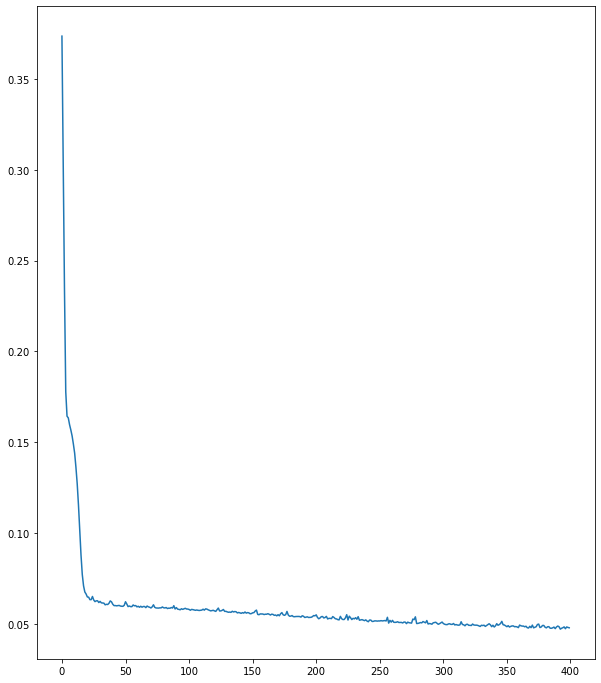

In [449]:
plt.plot(history3.history['loss'])
plt.show()

85


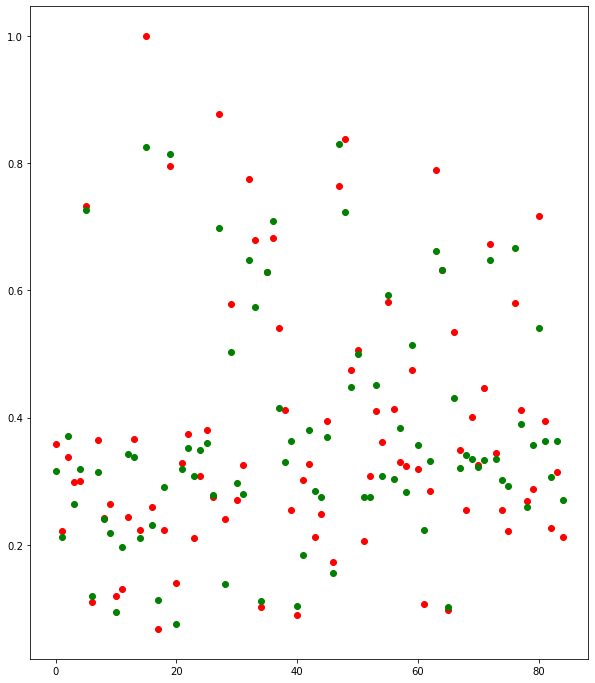

(85, 1)


In [450]:
results_Kuwait=model.predict(x_test_Kuwait)
print(len(results_Kuwait))

plt.scatter(range(len(y_test_Kuwait)),y_test_Kuwait,c='r')
plt.scatter(range(len(results_Kuwait)), results_Kuwait, c='g')
plt.show()
print(results_Kuwait.shape)

[[0.31586653 0.31586653 0.31586653 0.31586653]
 [0.21197164 0.21197164 0.21197164 0.21197164]
 [0.3706446  0.3706446  0.3706446  0.3706446 ]
 [0.26469567 0.26469567 0.26469567 0.26469567]
 [0.31929475 0.31929475 0.31929475 0.31929475]
 [0.7273072  0.7273072  0.7273072  0.7273072 ]
 [0.11983982 0.11983982 0.11983982 0.11983982]
 [0.3149334  0.3149334  0.3149334  0.3149334 ]
 [0.24069974 0.24069974 0.24069974 0.24069974]
 [0.2193765  0.2193765  0.2193765  0.2193765 ]
 [0.0947893  0.0947893  0.0947893  0.0947893 ]
 [0.19720918 0.19720918 0.19720918 0.19720918]
 [0.342972   0.342972   0.342972   0.342972  ]
 [0.3384936  0.3384936  0.3384936  0.3384936 ]
 [0.21064334 0.21064334 0.21064334 0.21064334]
 [0.8249541  0.8249541  0.8249541  0.8249541 ]
 [0.23092085 0.23092085 0.23092085 0.23092085]
 [0.11375204 0.11375204 0.11375204 0.11375204]
 [0.2908557  0.2908557  0.2908557  0.2908557 ]
 [0.81510794 0.81510794 0.81510794 0.81510794]
 [0.07551509 0.07551509 0.07551509 0.07551509]
 [0.319424   

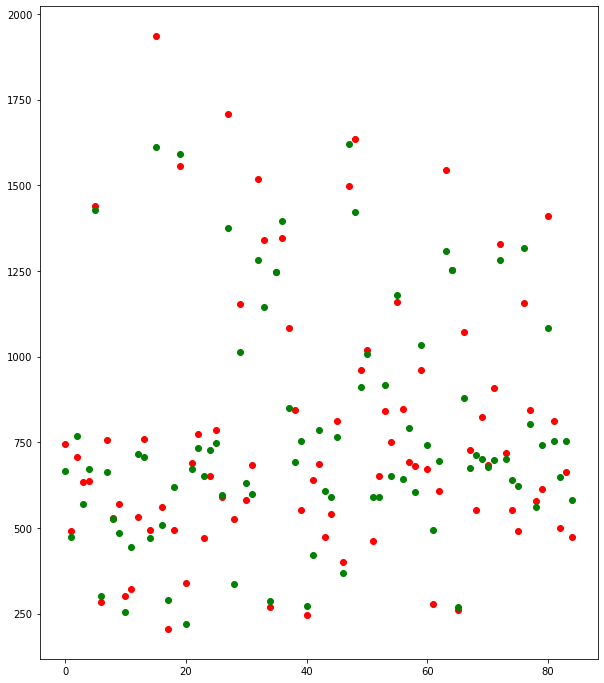

In [479]:
results_Kuwait2=results_Kuwait.reshape(-1,1)
forecast_copies3=np.repeat(results_Kuwait2,4,axis=-1)
print(forecast_copies3)
resultsNotScaledKuwait=scalarKuwaitCOVID.inverse_transform(forecast_copies3)
print(type(resultsNotScaledKuwait))
resultsNotScaledKuwait=resultsNotScaledKuwait[:,0]


y_test2_Kuwait=y_test_Kuwait.reshape(-1,1)
y_test2_Kuwait=np.repeat(y_test2_Kuwait,4,axis=-1)
targetNotScaledKuwait=scalarKuwaitCOVID.inverse_transform(y_test2_Kuwait)
targetNotScaledKuwait=targetNotScaledKuwait[:,0]


plt.scatter(range(len(targetNotScaledKuwait)),targetNotScaledKuwait,c='r')
plt.scatter(range(len(resultsNotScaledKuwait)),resultsNotScaledKuwait,c='g')
plt.show()

In [480]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(results_Kuwait,y_test_Kuwait))
print(rmse)
rmse=sqrt(mean_squared_error(resultsNotScaledKuwait, targetNotScaledKuwait))
print(rmse)

0.06847784849798717
127.02640214607833


In [481]:
QatarCOVID=df[["Qatar_new_cases","Qatar_Mean_Temp","Qatar_Mean_Dewpoint","Qatar_Mean_Windspeed"]]
QatarCOVID.shape

(431, 4)

In [482]:
scalarQatarCOVID=MinMaxScaler()
scalarQatarCOVID.fit(QatarCOVID)
normalizedQatarCOVID=scalarQatarCOVID.transform(QatarCOVID)

print(type(normalizedQatarCOVID[6][0]))
print(normalizedQatarCOVID[0][0],normalizedQatarCOVID[0][1],normalizedQatarCOVID[1][0],normalizedQatarCOVID[1][1])

<class 'numpy.float64'>
0.23584504044274157 0.34615384615384615 0.14431673052362706 0.34615384615384615


In [483]:
from numpy import hstack
n_input=7
n_output=1
casesQatar=[]
Qatartemp=[]
Qatardew=[]
Qatarwind=[]
number=normalizedQatarCOVID.shape[0]
print(number)
print(type(normalizedQatarCOVID))
targetQatar=[]
targetCases4=normalizedQatarCOVID[:,0]
for i in range(0,number):
    casesQatar.append(normalizedQatarCOVID[i][0])
    Qatartemp.append(normalizedQatarCOVID[i][1])
    Qatardew.append(normalizedQatarCOVID[i][2])
    Qatarwind.append(normalizedQatarCOVID[i][3])

casesQatar=np.array(casesQatar)
Qatartemp=np.array(Qatartemp)
Qatardew=np.array(Qatardew)
Qatarwind=np.array(Qatarwind)
print(len(casesQatar),len(Qatartemp),len(Qatardew),len(Qatarwind))
casesQatar=casesQatar.reshape(len(casesQatar),1)
Qatartemp=Qatartemp.reshape(len(Qatartemp),1)
Qatardew=Qatardew.reshape(len(Qatardew),1)
Qatarwind=Qatarwind.reshape(len(Qatarwind),1)
print(casesQatar.shape)
datasetQatar=hstack((casesQatar,Qatartemp,Qatardew,Qatarwind))
print(datasetQatar.shape)
generatorQatar=TimeseriesGenerator(datasetQatar,targetCases4,length=n_input,batch_size=1)
print(generatorQatar[1])

431
<class 'numpy.ndarray'>
431 431 431 431
(431, 1)
(431, 4)
(array([[[0.14431673, 0.34615385, 0.60416667, 0.3125    ],
        [0.18475947, 0.38461538, 0.72916667, 0.3125    ],
        [0.23882503, 0.42307692, 0.64583333, 0.3125    ],
        [0.21796509, 0.42307692, 0.58333333, 0.25      ],
        [0.25627927, 0.42307692, 0.60416667, 0.25      ],
        [0.26266496, 0.42307692, 0.64583333, 0.3125    ],
        [0.32141337, 0.53846154, 0.66666667, 0.25      ]]]), array([0.35206471]))


In [484]:
dataQatar=[]
targetQatar=[]
for i in range(len(generatorQatar)):
    data5,target5=generatorQatar[i]
    dataQatar.append(data5[0,:,:])
    xx=float(target5)
    targetQatar.append(xx)
dataQatar=np.array(dataQatar)
targetQatar=np.array(targetQatar)
print(type(dataQatar))
print(dataQatar.shape)
print(targetQatar.shape)
x_train_Qatar,x_test_Qatar,y_train_Qatar,y_test_Qatar=train_test_split(dataQatar,targetQatar,test_size=0.2,random_state=4)
print(type(dataQatar))
print(x_train_Qatar.shape)

<class 'numpy.ndarray'>
(424, 7, 4)
(424,)
<class 'numpy.ndarray'>
(339, 7, 4)


In [485]:
model=Sequential()
model.add(LSTM((10),input_shape=(x_train_Qatar.shape[1],x_train_Qatar.shape[2]),return_sequences=True))
model.add(LSTM((10),return_sequences=True))
model.add(LSTM((1),return_sequences=False))
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_74 (LSTM)               (None, 7, 10)             600       
_________________________________________________________________
lstm_75 (LSTM)               (None, 7, 10)             840       
_________________________________________________________________
lstm_76 (LSTM)               (None, 1)                 48        
Total params: 1,488
Trainable params: 1,488
Non-trainable params: 0
_________________________________________________________________


In [486]:
history4=model.fit(x_train_Qatar, y_train_Qatar, epochs=400, validation_data=(x_test_Qatar,y_test_Qatar))


Epoch 1/400
11/11 [==============================] - 8s 150ms/step - loss: 0.1827 - accuracy: 0.0055 - val_loss: 0.1350 - val_accuracy: 0.0000e+00
Epoch 2/400
11/11 [==============================] - 0s 12ms/step - loss: 0.1488 - accuracy: 0.0027 - val_loss: 0.1332 - val_accuracy: 0.0000e+00
Epoch 3/400
11/11 [==============================] - 0s 11ms/step - loss: 0.1244 - accuracy: 0.0081 - val_loss: 0.1271 - val_accuracy: 0.0000e+00
Epoch 4/400
11/11 [==============================] - 0s 12ms/step - loss: 0.1267 - accuracy: 0.0042 - val_loss: 0.1211 - val_accuracy: 0.0000e+00
Epoch 5/400
11/11 [==============================] - 0s 16ms/step - loss: 0.1204 - accuracy: 0.0081 - val_loss: 0.1157 - val_accuracy: 0.0000e+00
Epoch 6/400
11/11 [==============================] - 0s 12ms/step - loss: 0.1112 - accuracy: 0.0081 - val_loss: 0.1091 - val_accuracy: 0.0000e+00
Epoch 7/400
11/11 [==============================] - 0s 10ms/step - loss: 0.1012 - accuracy: 0.0033 - val_loss: 0.1000 - va

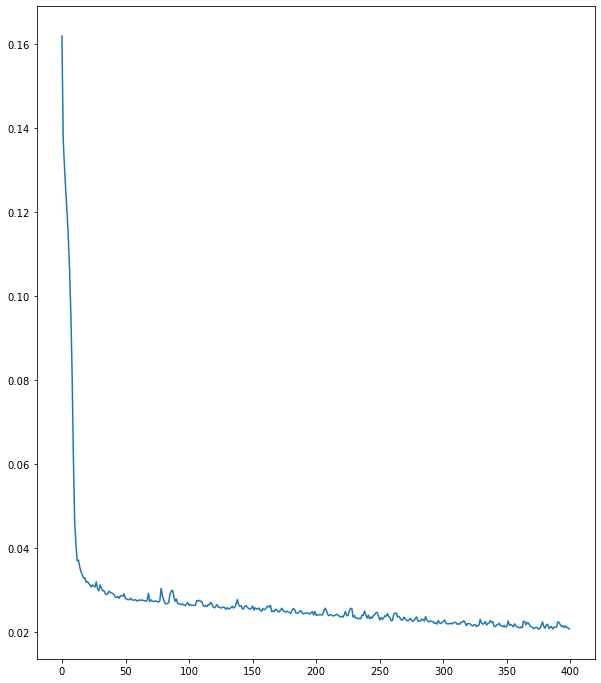

In [487]:
plt.plot(history4.history['loss'])
plt.show()

85


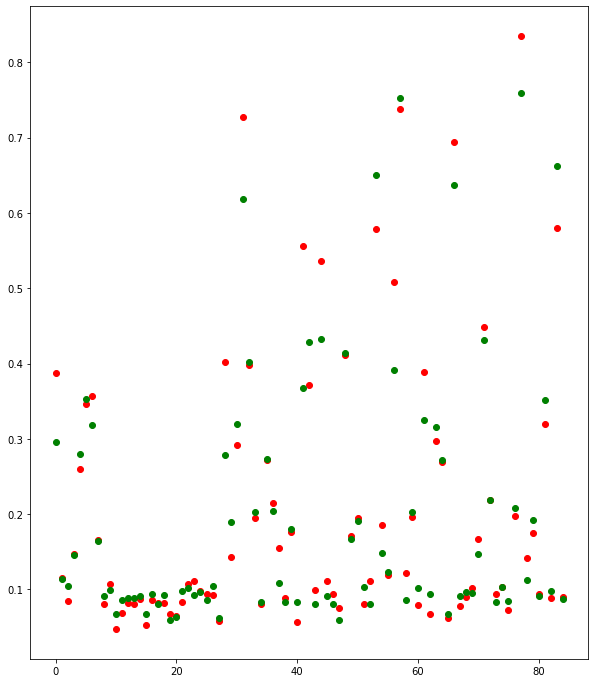

(85, 1)


In [488]:
results_Qatar=model.predict(x_test_Qatar)
print(len(results_Qatar))

plt.scatter(range(len(y_test_Qatar)),y_test_Qatar,c='r')
plt.scatter(range(len(results_Qatar)), results_Qatar, c='g')
plt.show()
print(results_Qatar.shape)

[[0.2961009  0.2961009  0.2961009  0.2961009 ]
 [0.11439954 0.11439954 0.11439954 0.11439954]
 [0.10446933 0.10446933 0.10446933 0.10446933]
 [0.14575708 0.14575708 0.14575708 0.14575708]
 [0.27977479 0.27977479 0.27977479 0.27977479]
 [0.3529085  0.3529085  0.3529085  0.3529085 ]
 [0.31803107 0.31803107 0.31803107 0.31803107]
 [0.16394158 0.16394158 0.16394158 0.16394158]
 [0.09075972 0.09075972 0.09075972 0.09075972]
 [0.0994375  0.0994375  0.0994375  0.0994375 ]
 [0.06705801 0.06705801 0.06705801 0.06705801]
 [0.08652735 0.08652735 0.08652735 0.08652735]
 [0.08896936 0.08896936 0.08896936 0.08896936]
 [0.08922131 0.08922131 0.08922131 0.08922131]
 [0.09113219 0.09113219 0.09113219 0.09113219]
 [0.06776688 0.06776688 0.06776688 0.06776688]
 [0.09352572 0.09352572 0.09352572 0.09352572]
 [0.08014751 0.08014751 0.08014751 0.08014751]
 [0.09297975 0.09297975 0.09297975 0.09297975]
 [0.05891507 0.05891507 0.05891507 0.05891507]
 [0.06396117 0.06396117 0.06396117 0.06396117]
 [0.09738994 

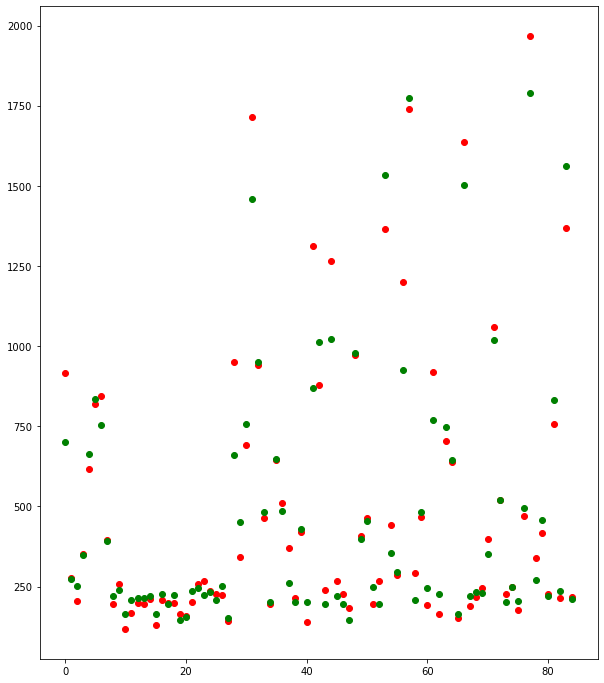

In [489]:
results_Qatar2=results_Qatar.reshape(-1,1)
forecast_copies4=np.repeat(results_Qatar2,4,axis=-1)
print(forecast_copies4)
resultsNotScaledQatar=scalarQatarCOVID.inverse_transform(forecast_copies4)
print(type(resultsNotScaledQatar))
resultsNotScaledQatar=resultsNotScaledQatar[:,0]


y_test2_Qatar=y_test_Qatar.reshape(-1,1)
y_test2_Qatar=np.repeat(y_test2_Qatar,4,axis=-1)
targetNotScaledQatar=scalarQatarCOVID.inverse_transform(y_test2_Qatar)
targetNotScaledQatar=targetNotScaledQatar[:,0]


plt.scatter(range(len(targetNotScaledQatar)),targetNotScaledQatar,c='r')
plt.scatter(range(len(resultsNotScaledQatar)),resultsNotScaledQatar,c='g')
plt.show()

In [490]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(results_Qatar,y_test_Qatar))
print(rmse)
rmse=sqrt(mean_squared_error(resultsNotScaledQatar, targetNotScaledQatar))
print(rmse)

0.041264253354331114
96.92972740584003


In [491]:
OmanCOVID=df[["Oman_new_cases","Oman_Mean_Temp","Oman_Mean_Dewpoint","Oman_Mean_Windspeed"]]
OmanCOVID.shape

(431, 4)

<AxesSubplot:>

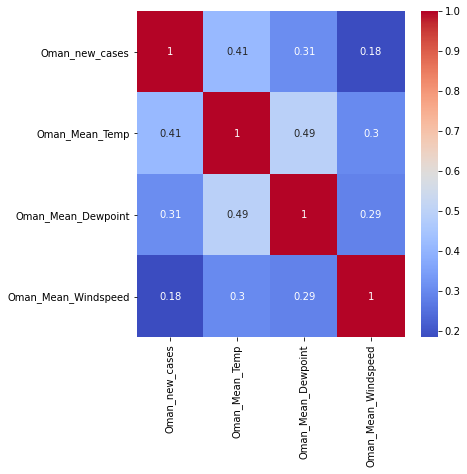

In [492]:
plt.figure(figsize=(6,6))
sns.heatmap(OmanCOVID.corr(method='spearman'), annot=True, cmap='coolwarm')

In [493]:
scalarOmanCOVID=MinMaxScaler()
scalarOmanCOVID.fit(OmanCOVID)
normalizedOmanCOVID=scalarOmanCOVID.transform(OmanCOVID)

print(type(normalizedOmanCOVID[6][0]))
print(normalizedOmanCOVID[0][0],normalizedOmanCOVID[0][1],normalizedOmanCOVID[1][0],normalizedOmanCOVID[1][1])

<class 'numpy.float64'>
0.002649507948523846 0.41666666666666674 0.014193792581377745 0.41666666666666674


In [494]:
from numpy import hstack
n_input=7
n_output=1
casesOman=[]
Omantemp=[]
Omandew=[]
Omanwind=[]
number=normalizedOmanCOVID.shape[0]
print(number)
print(type(normalizedOmanCOVID))
targetOman=[]
targetCases5=normalizedOmanCOVID[:,0]
for i in range(0,number):
    casesOman.append(normalizedOmanCOVID[i][0])
    Omantemp.append(normalizedOmanCOVID[i][1])
    Omandew.append(normalizedOmanCOVID[i][2])
    Omanwind.append(normalizedOmanCOVID[i][3])

casesOman=np.array(casesOman)
Omantemp=np.array(Omantemp)
Omandew=np.array(Omandew)
Omanwind=np.array(Omanwind)
print(len(casesOman),len(Omantemp),len(Omandew),len(Omanwind))
casesOman=casesOman.reshape(len(casesOman),1)
Omantemp=Omantemp.reshape(len(Omantemp),1)
Omandew=Omandew.reshape(len(Omandew),1)
Omanwind=Omanwind.reshape(len(Omanwind),1)
print(casesOman.shape)
datasetOman=hstack((casesOman,Omantemp,Omandew,Omanwind))
print(datasetOman.shape)
generatorOman=TimeseriesGenerator(datasetOman,targetCases5,length=n_input,batch_size=1)
print(generatorOman[1])

431
<class 'numpy.ndarray'>
431 431 431 431
(431, 1)
(431, 4)
(array([[[0.01419379, 0.41666667, 0.71428571, 0.35714286],
        [0.00946253, 0.45833333, 0.79591837, 0.35714286],
        [0.02043906, 0.54166667, 0.73469388, 0.35714286],
        [0.01173354, 0.58333333, 0.55102041, 0.42857143],
        [0.01324754, 0.58333333, 0.59183673, 0.14285714],
        [0.01249054, 0.58333333, 0.48979592, 0.21428571],
        [0.00719152, 0.625     , 0.36734694, 0.21428571]]]), array([0.01495079]))


In [495]:
dataOman=[]
targetOman=[]
for i in range(len(generatorOman)):
    data6,target6=generatorOman[i]
    dataOman.append(data6[0,:,:])
    xx=float(target6)
    targetOman.append(xx)
dataOman=np.array(dataOman)
targetOman=np.array(targetOman)
print(type(dataOman))
print(dataOman.shape)
print(targetOman.shape)
x_train_Oman,x_test_Oman,y_train_Oman,y_test_Oman=train_test_split(dataOman,targetOman,test_size=0.2,random_state=4)
print(type(dataOman))
print(x_train_Oman.shape)

<class 'numpy.ndarray'>
(424, 7, 4)
(424,)
<class 'numpy.ndarray'>
(339, 7, 4)


In [496]:
model=Sequential()
model.add(LSTM((10),input_shape=(x_train_Oman.shape[1],x_train_Oman.shape[2]),return_sequences=True))
model.add(LSTM((10),return_sequences=True))
model.add(LSTM((1),return_sequences=False))
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_77 (LSTM)               (None, 7, 10)             600       
_________________________________________________________________
lstm_78 (LSTM)               (None, 7, 10)             840       
_________________________________________________________________
lstm_79 (LSTM)               (None, 1)                 48        
Total params: 1,488
Trainable params: 1,488
Non-trainable params: 0
_________________________________________________________________


In [497]:
history5=model.fit(x_train_Oman, y_train_Oman, epochs=400, validation_data=(x_test_Oman,y_test_Oman))


Epoch 1/400
11/11 [==============================] - 7s 204ms/step - loss: 0.1065 - accuracy: 0.0027 - val_loss: 0.0737 - val_accuracy: 0.0000e+00
Epoch 2/400
11/11 [==============================] - 0s 15ms/step - loss: 0.0831 - accuracy: 7.5206e-04 - val_loss: 0.0714 - val_accuracy: 0.0000e+00
Epoch 3/400
11/11 [==============================] - 0s 13ms/step - loss: 0.0782 - accuracy: 0.0033 - val_loss: 0.0681 - val_accuracy: 0.0000e+00
Epoch 4/400
11/11 [==============================] - 0s 12ms/step - loss: 0.0765 - accuracy: 0.0027 - val_loss: 0.0640 - val_accuracy: 0.0000e+00
Epoch 5/400
11/11 [==============================] - 0s 11ms/step - loss: 0.0701 - accuracy: 0.0055 - val_loss: 0.0608 - val_accuracy: 0.0000e+00
Epoch 6/400
11/11 [==============================] - 0s 12ms/step - loss: 0.0587 - accuracy: 0.0055 - val_loss: 0.0581 - val_accuracy: 0.0000e+00
Epoch 7/400
11/11 [==============================] - 0s 11ms/step - loss: 0.0622 - accuracy: 0.0081 - val_loss: 0.0556 

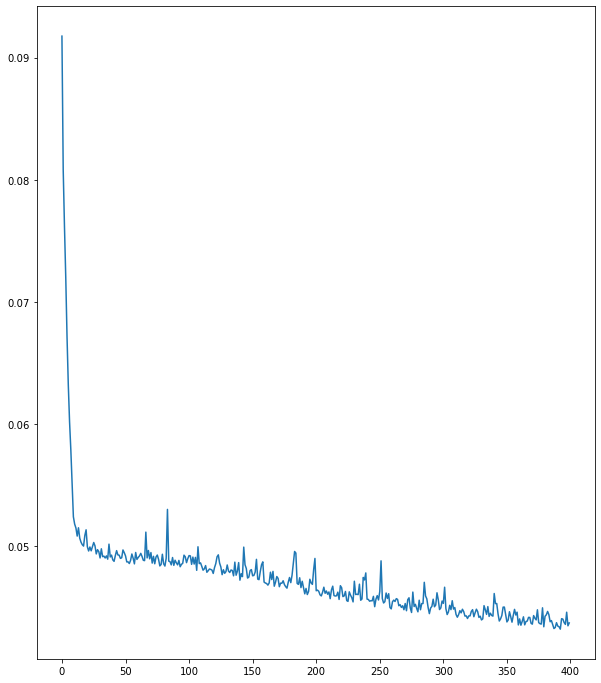

In [498]:
plt.plot(history5.history['loss'])
plt.show()

85


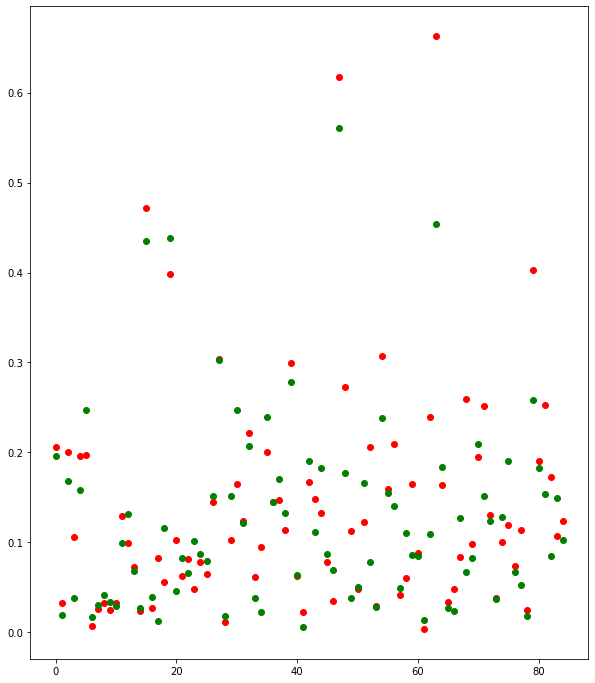

(85, 1)


In [499]:
results_Oman=model.predict(x_test_Oman)
print(len(results_Oman))

plt.scatter(range(len(y_test_Oman)),y_test_Oman,c='r')
plt.scatter(range(len(results_Oman)), results_Oman, c='g')
plt.show()
print(results_Oman.shape)

[[0.19646409 0.19646409 0.19646409 0.19646409]
 [0.01903022 0.01903022 0.01903022 0.01903022]
 [0.16843605 0.16843605 0.16843605 0.16843605]
 [0.03828135 0.03828135 0.03828135 0.03828135]
 [0.15798879 0.15798879 0.15798879 0.15798879]
 [0.24684972 0.24684972 0.24684972 0.24684972]
 [0.01739449 0.01739449 0.01739449 0.01739449]
 [0.0308772  0.0308772  0.0308772  0.0308772 ]
 [0.04121974 0.04121974 0.04121974 0.04121974]
 [0.03383527 0.03383527 0.03383527 0.03383527]
 [0.02920571 0.02920571 0.02920571 0.02920571]
 [0.09978744 0.09978744 0.09978744 0.09978744]
 [0.13205658 0.13205658 0.13205658 0.13205658]
 [0.06833877 0.06833877 0.06833877 0.06833877]
 [0.02689847 0.02689847 0.02689847 0.02689847]
 [0.43453303 0.43453303 0.43453303 0.43453303]
 [0.03966518 0.03966518 0.03966518 0.03966518]
 [0.01272959 0.01272959 0.01272959 0.01272959]
 [0.11607959 0.11607959 0.11607959 0.11607959]
 [0.43828827 0.43828827 0.43828827 0.43828827]
 [0.04569925 0.04569925 0.04569925 0.04569925]
 [0.08272792 

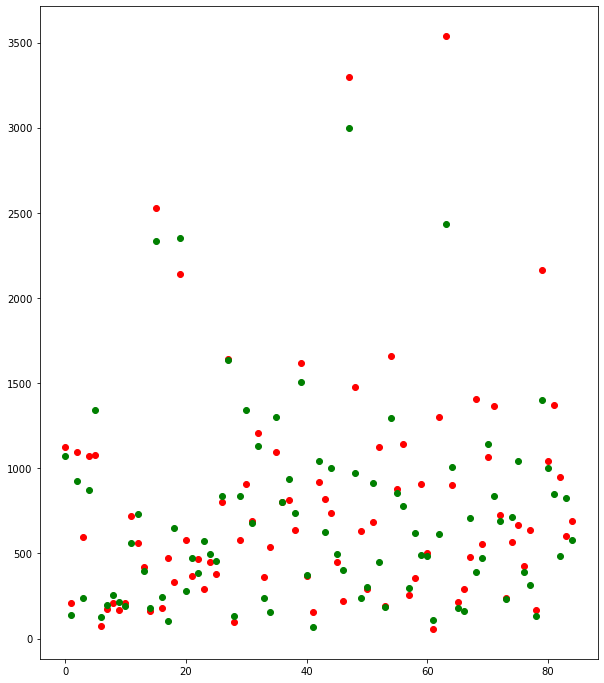

In [502]:
results_Oman2=results_Oman.reshape(-1,1)
forecast_copies5=np.repeat(results_Oman2,4,axis=-1)
print(forecast_copies5)
resultsNotScaledOman=scalarOmanCOVID.inverse_transform(forecast_copies5)
print(type(resultsNotScaledOman))
resultsNotScaledOman=resultsNotScaledOman[:,0]


y_test2_Oman=y_test_Oman.reshape(-1,1)
y_test2_Oman=np.repeat(y_test2_Oman,4,axis=-1)
targetNotScaledOman=scalarOmanCOVID.inverse_transform(y_test2_Oman)
targetNotScaledOman=targetNotScaledOman[:,0]


plt.scatter(range(len(targetNotScaledOman)),targetNotScaledOman,c='r')
plt.scatter(range(len(resultsNotScaledOman)),resultsNotScaledOman,c='g')
plt.show()

In [503]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(results_Oman,y_test_Oman))
print(rmse)
rmse=sqrt(mean_squared_error(resultsNotScaledOman, targetNotScaledOman))
print(rmse)

0.05645131790448097
298.2887603358028
